# Project Testing

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np
import dlib
import imutils
import pandas as pd
from os import listdir
from os.path import isfile, join

In [2]:
IMG_DIR_PATH = "../../data/"

detector = dlib.get_frontal_face_detector()

In [3]:
sections = 8
def equal_divide_frames(frame_count, sections):
    sectsize = frame_count/sections
    p = 0
    frames = []
    for i in range(sections - 1):
        frames.append(round(p))
        p += sectsize
    frames.append(frame_count - 1)
    return frames

def process_specific_frame(cap, frame_no, width=100):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    ret, frame = cap.read()
    if ret is not None:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces_loc = detector(frame, 0)
        if len(faces_loc) > 0:
            face_loc = faces_loc[0]
            wh = np.max([face_loc.width(), face_loc.height()])
            x = face_loc.left()
            y = face_loc.top()
            frame = frame[y:y+wh, x:x+wh]
        if (frame.shape[0] < frame.shape[1]):
            frame = imutils.resize(frame, height=width)
        else:
            frame = imutils.resize(frame, width=width)
        frame = frame[0:width, 0:width]
    else:
        frame = np.zeros((width,width,3))
    return frame
    
def process_specific_frames(cap, frame_nos, width=100):
    frame = None
    for i in range(len(frame_nos)):
        frame_no = frame_nos[i]
        cframe = process_specific_frame(cap, frame_no, width)
        if frame is not None:
            frame = np.hstack([frame, cframe])
        else:
            frame = cframe
    return frame

def plot_by_file_no(file_num, kind='scatter', sections=8, width=100):
    file_name = files[file_num]
    cap = cv2.VideoCapture(IMG_DIR_PATH + file_name)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_nos = equal_divide_frames(frame_count, sections)
    frame = process_specific_frames(cap, frame_nos, width)
    figsize = (sections*width) / float(80), width / float(80)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis("off")
    ax.imshow(frame, cmap='gray')
    plt.show()
    #print(IMG_DIR_PATH + file_name +"_kss.csv")
    df = pd.read_csv(IMG_DIR_PATH + file_name +"_kss.csv",header=0,dtype={'ts':np.int32,'value':np.float32})
    if not df.empty:
        figsize = 1050 / float(80), 150 / float(80)
        df.plot(x='ts',y='value',kind=kind, figsize=figsize, title=file_name);
        print("Average KSS: %.2f" % (df["value"].mean()*10) )
    else:
        print(file_name)
        print("Not enough movement to register KSS")

files = [f for f in listdir(IMG_DIR_PATH) if not f.startswith('.') and f.endswith('.avi') and isfile(join(IMG_DIR_PATH,f))]

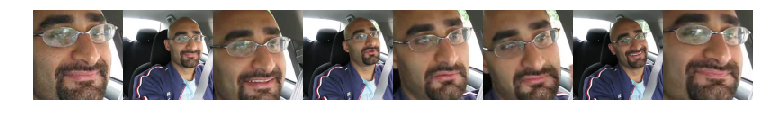

Average KSS: 1.14


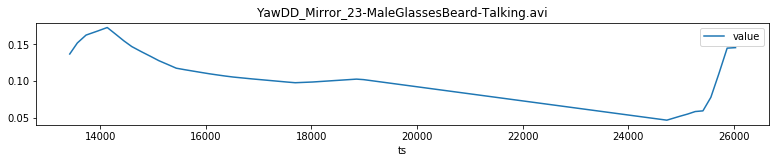

In [4]:
plot_by_file_no(0,'line')

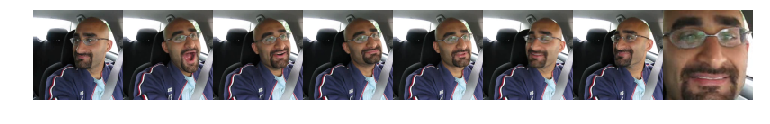

Average KSS: 2.52


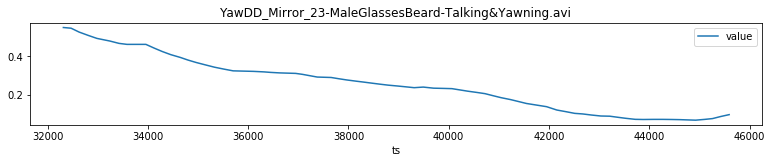

In [5]:
plot_by_file_no(1,'line')

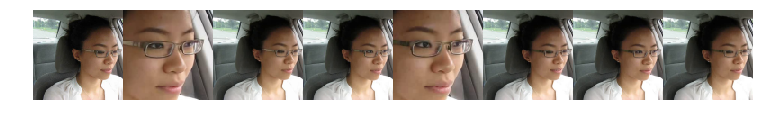

YawDD_Mirror_31-FemaleGlasses-Normal.avi
Not enough movement to register KSS


In [6]:
plot_by_file_no(2,'line')

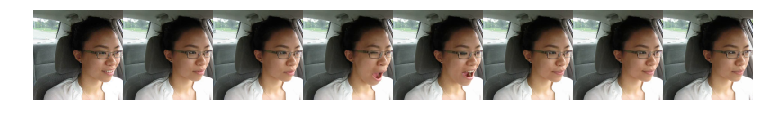

YawDD_Mirror_31-FemaleGlasses-Yawning.avi
Not enough movement to register KSS


In [7]:
plot_by_file_no(3,'line')

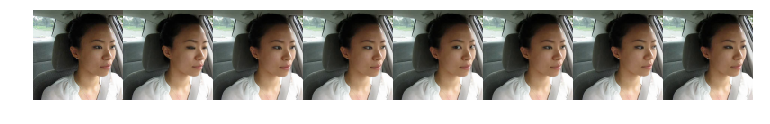

YawDD_Mirror_31-FemaleNoGlasses-Normal.avi
Not enough movement to register KSS


In [8]:
plot_by_file_no(4,'line')

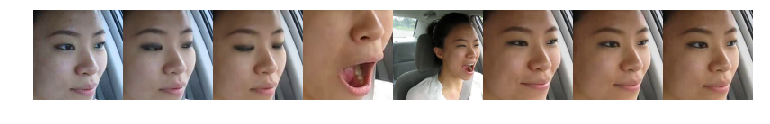

Average KSS: 3.46


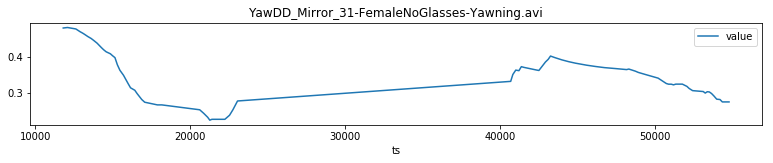

In [9]:
plot_by_file_no(5,'line')

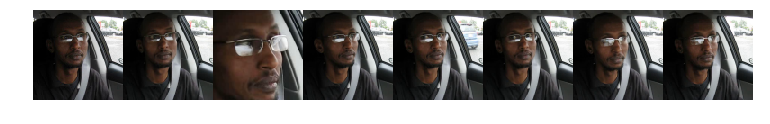

Average KSS: 5.09


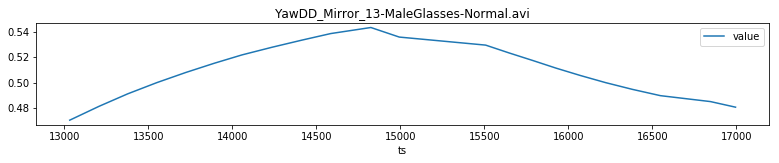

In [10]:
plot_by_file_no(6,'line')

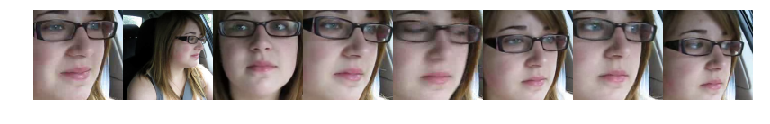

Average KSS: 1.82


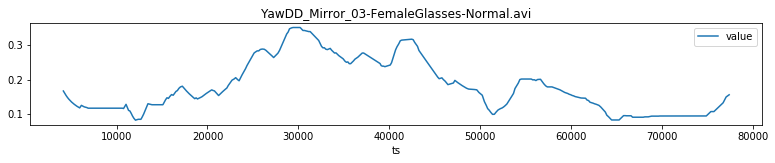

In [11]:
plot_by_file_no(7,'line')

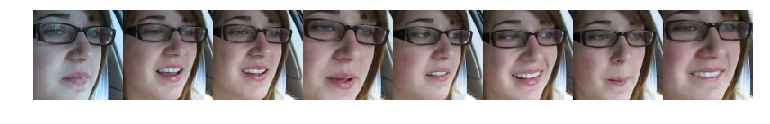

Average KSS: 2.43


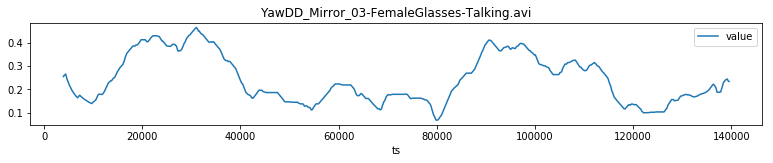

In [12]:
plot_by_file_no(8,'line')

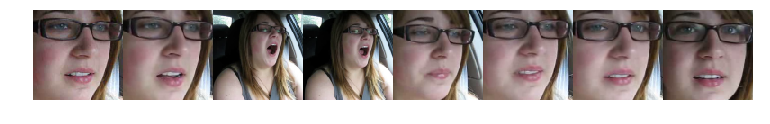

Average KSS: 2.29


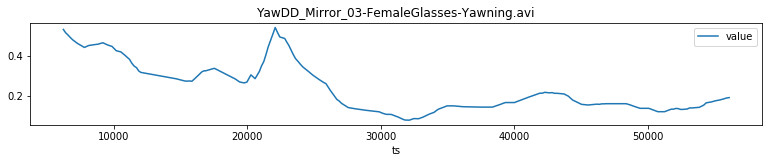

In [13]:
plot_by_file_no(9,'line')

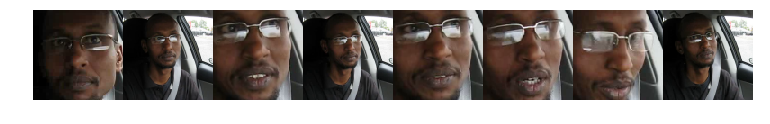

Average KSS: 2.19


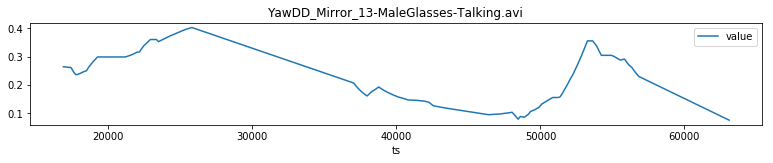

In [14]:
plot_by_file_no(10,'line')

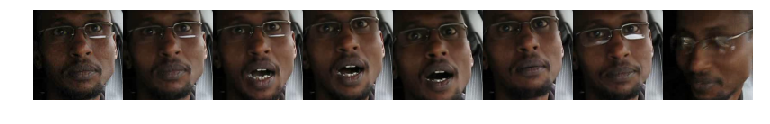

Average KSS: 1.09


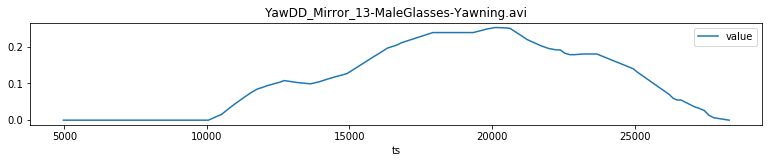

In [15]:
plot_by_file_no(11,'line')

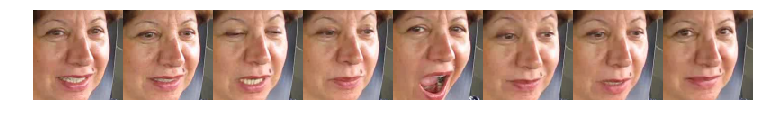

Average KSS: 1.64


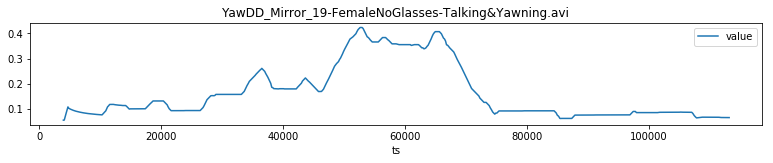

In [16]:
plot_by_file_no(12,'line')

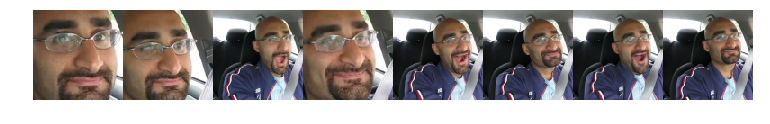

YawDD_Mirror_23-MaleGlassesBeard-Yawning.avi
Not enough movement to register KSS


In [17]:
plot_by_file_no(13,'line')

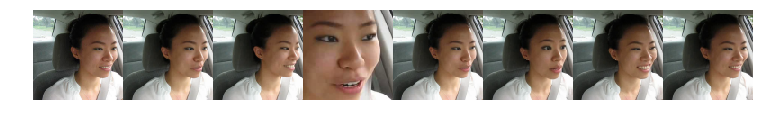

Average KSS: 1.64


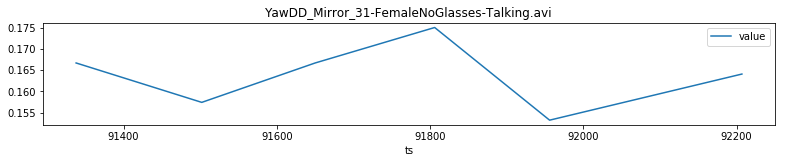

In [18]:
plot_by_file_no(14,'line')

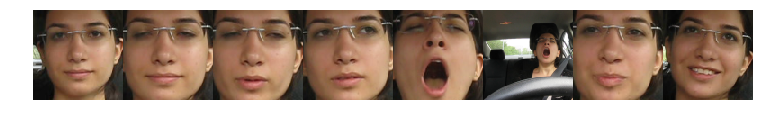

Average KSS: 0.31


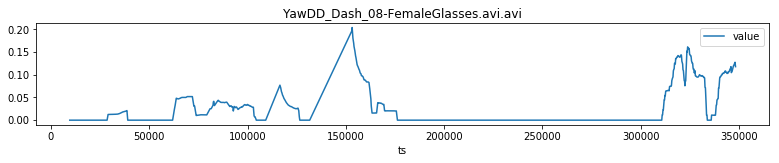

In [19]:
plot_by_file_no(15,'line')

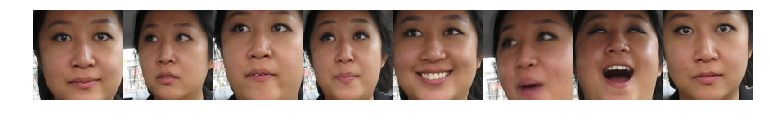

Average KSS: 0.24


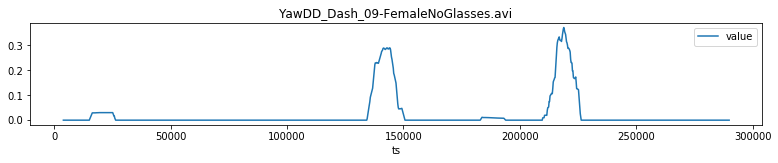

In [20]:
plot_by_file_no(16,'line')

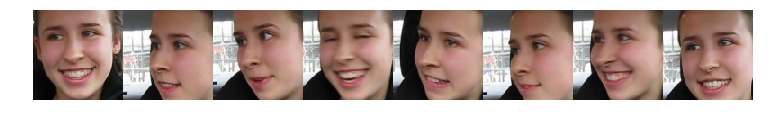

Average KSS: 0.74


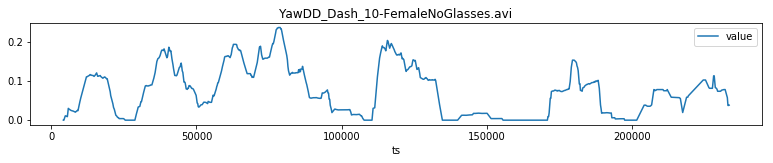

In [21]:
plot_by_file_no(17,'line')

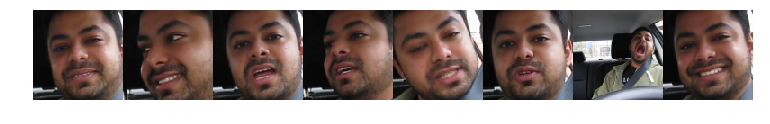

Average KSS: 3.09


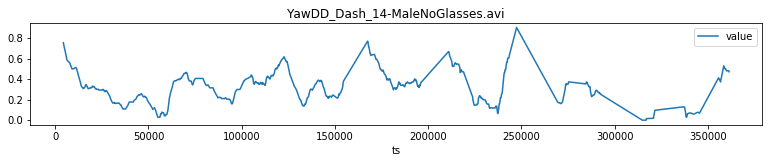

In [22]:
plot_by_file_no(18,'line')

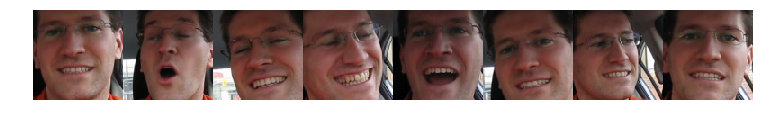

Average KSS: 2.93


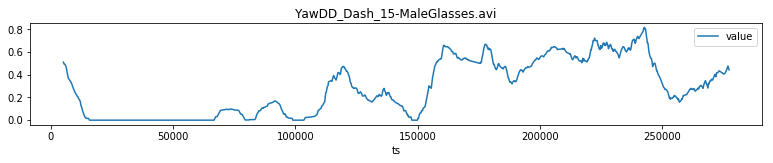

In [23]:
plot_by_file_no(19,'line')

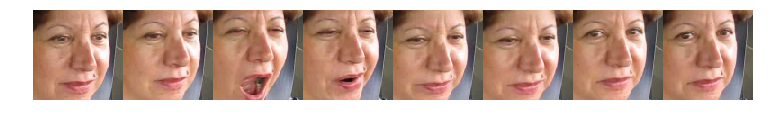

Average KSS: 1.14


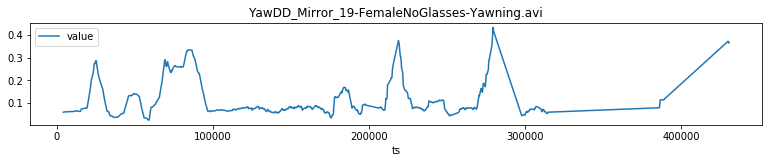

In [24]:
plot_by_file_no(20,'line')

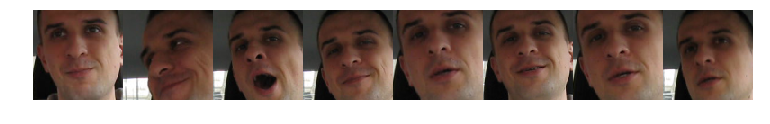

Average KSS: 2.29


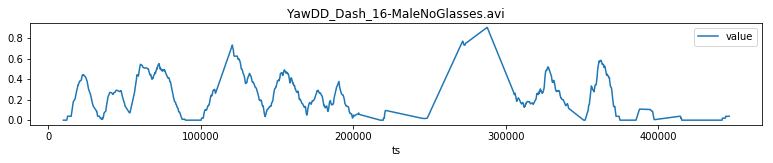

In [25]:
plot_by_file_no(21,'line')

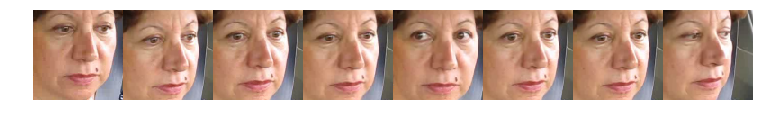

Average KSS: 1.35


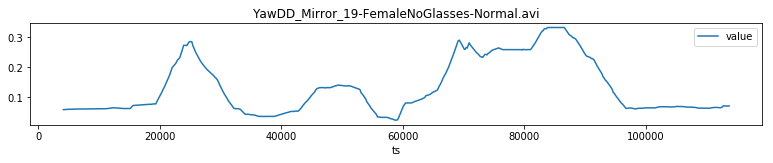

In [26]:
plot_by_file_no(22,'line')

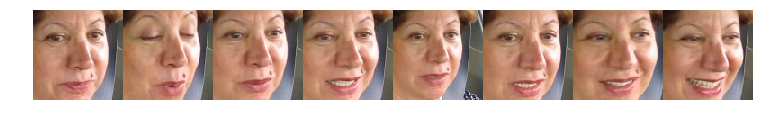

Average KSS: 1.13


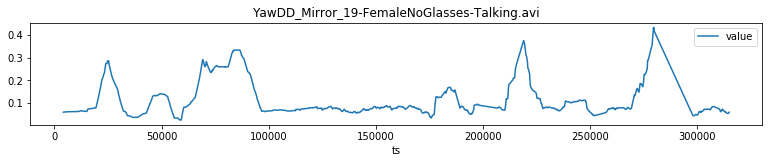

In [27]:
plot_by_file_no(23,'line')

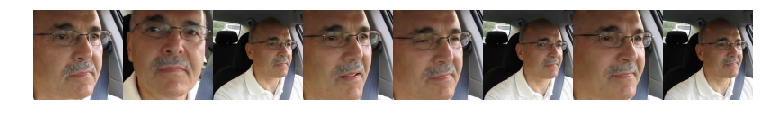

Average KSS: 0.64


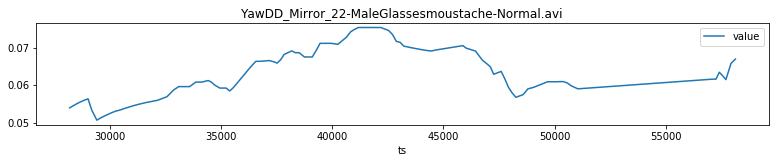

In [28]:
plot_by_file_no(24,'line')

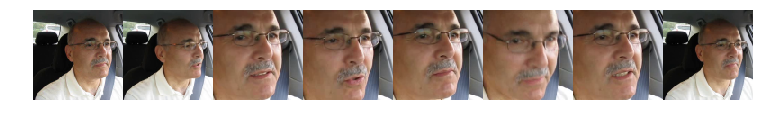

Average KSS: 0.82


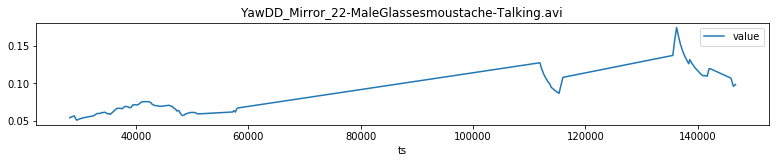

In [29]:
plot_by_file_no(25,'line')

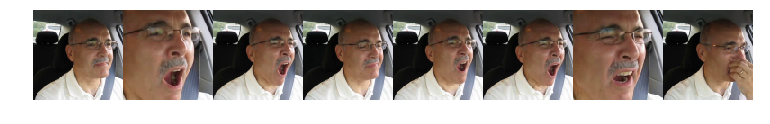

Average KSS: 1.04


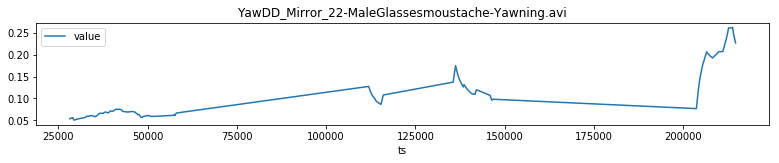

In [30]:
plot_by_file_no(26,'line')

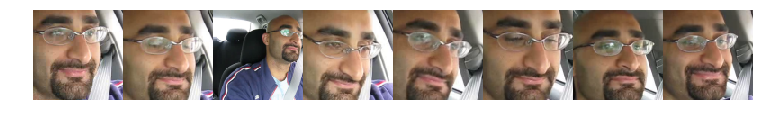

Average KSS: 1.27


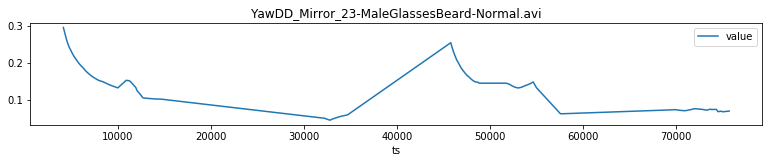

In [31]:
plot_by_file_no(27,'line')

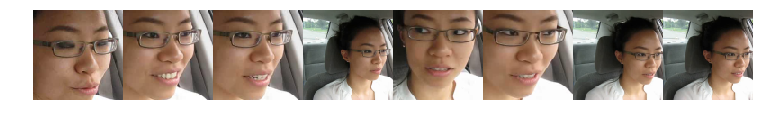

Average KSS: 1.59


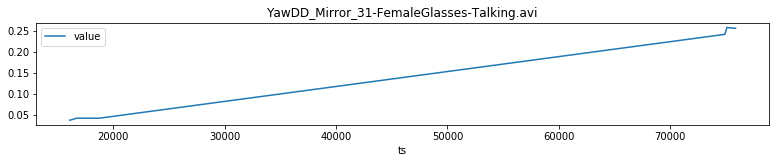

In [32]:
plot_by_file_no(28,'line')